# Bosques Aleatorios


## Introducción

Los Random Forest también conocidos como 'Bosques Aleatorios' es una combinación de árboles predictores tal que cada árbol depende de los valores de un vector aleatorio probado independientemente y con la misma distribución para cada uno de estos. El término aparece de la primera propuesta de Random Decision Forests, hecha por Tin Kam Ho de Bell Labs en 1995. El método combina la idea de Bagging de Breiman y la selección aleatoria de atributos, introducida independientemente por Ho, Amit y Geman para construir una colección de árboles de decisión con variación controlada.

En muchos problemas el rendimiento del algoritmo Random Forest es muy similar al del Boosting, y es más simple de entrenar y ajustar. Como consecuencia, el Random Forest es popular y ampliamente utilizado.

La idea esencial del Bagging es promediar muchos modelos ruidosos, pero aproximadamente imparciales, y por tanto reducir la variación. Los árboles son los candidatos ideales para el Bagging, dado que ellos pueden registrar estructuras de interacción compleja en los datos, y si crecen suficientemente profundo, tienen relativamente baja parcialidad. Producto de que los árboles son notoriamente ruidosos, ellos se benefician enormemente al promediar.

Cada árbol es construido usando el siguiente algoritmo:

1. Sea N el número de casos de prueba, M es el número de variables en el clasificador
2. Sea m el número de variables de entrada a ser usadas para determinar la decisión en un nodo dado; m debe ser mucho menor que M
3. Elegir un conjunto de entrenamiento para este árbol y usar el resto de los casos de prueba para estimar el error
4. Para cada nodo del árbol, elegir aleatoriamente m variables en las cuales basar la decisión. Calcular la mejor partición del conjunto de entrenamiento a partir de las m variables
5. Para predecir un nuevo caso se evalúa el individuo en el árbol, luego se le asigna la etiqueta del nodo terminal. Este proceso es iterado por todos los árboles en el ensamblado, y la etiqueta que obtenga la mayor cantidad de incidencias es reportada como la predicción.

## Ventajas

- Para un set de datos lo suficientemente grande produce un clasificador muy certero
- Corre eficientemente en bases de datos grandes
- Permite incluir cientos de variables de entrada sin excluir ninguna
- Estima qué variables son importantes en la clasificación 


## Desventajas

- El Random Forests sobreajusta en ciertos grupos de datos con tareas de clasificación/regresión ruidosa
- A diferencia de los árboles de decisión, la clasificación hecha por Random Forests es difícil de interpretar. Para los datos que incluyen variables categóricas con diferente número de niveles, el Random Forests se parcializa a favor de esos atributos con más niveles. Por consiguiente, la posición que marca la variable no es fiable para este tipo de datos

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
# Lectura de datos
datos= pd.read_csv('data/filtered1_dataset.csv', sep=',', index_col="patient_id")
datos.head()

,treatment,birth_date,start_date,start_night,end_night,gender,height,weight,age,smoking,...,beer,wine,alcohol,strong_licor,sistolic,diastolic,heart_rate,pulse_pressure,cardiac_index,systemic_vascular_resistance
patient_id,,,,,,,,,,,,,,,,,,,,,
30,True,1983-12-25 00:00:00,2017-11-01 07:02:00,2017-10-27 04:30:00,2017-10-27 06:30:00,m,1.78,102.0,33.854327,0,...,0,0,1,0,120.457143,79.957143,72.685714,41.0,2.3,1158.0
31,False,1946-10-09 00:00:00,2017-11-01 08:40:00,2017-11-02 02:00:00,2017-11-02 04:00:00,m,1.67,82.4,71.064644,0,...,0,0,1,0,143.405405,91.067568,65.500000,52.0,2.8,1417.0
32,True,1960-02-14 00:00:00,2017-11-01 09:57:00,2017-11-02 03:00:00,2017-11-02 05:00:00,m,1.70,93.2,57.715030,0,...,0,1,1,0,122.557143,90.257143,80.628571,32.0,3.0,1319.0
33,False,1974-03-11 00:00:00,2017-11-01 10:17:00,2017-11-02 03:20:00,2017-11-02 05:20:00,f,1.60,61.3,43.645252,0,...,0,0,0,0,145.893939,93.863636,79.787879,52.0,4.2,1353.0
34,True,1996-06-26 00:00:00,2017-11-01 10:36:00,2017-11-02 04:30:00,2017-11-02 06:30:00,m,1.73,72.3,21.350970,0,...,1,0,1,0,130.376812,82.739130,77.913043,48.0,3.2,1172.0


In [3]:
# Extraemos la variable respuesta "treatment"
y = datos["treatment"]
y.head()

patient_id
30     True
31    False
32     True
33    False
34     True
Name: treatment, dtype: bool

In [4]:
np.shape(y)

(17644,)

A continuación se presenta la frecuencia por categoría para la variable **treatment** (True - False)

treatment
False    9429
True     8215
dtype: int64


/Users/lescobar/.anaconda/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


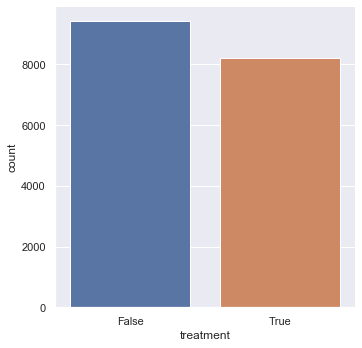

In [5]:
print(datos.groupby('treatment').size())
sns.factorplot('treatment',data=datos,kind="count")


Se observa que el 53% de la población no tiene tratamiento (False) y el 47% si tiene tratamiento (True). Como nos encontramos frente a un conjunto de datos balanceados se procede a ajustar el modelo sin realizar proceso de balanceo sobre la base, pues no incurririamos en sesgos en la estimación.

In [6]:
# Extraer las variables independientes 
X = datos.iloc[:,6:]
X.head()

,height,weight,age,smoking,excercise_frecuency,beer,wine,alcohol,strong_licor,sistolic,diastolic,heart_rate,pulse_pressure,cardiac_index,systemic_vascular_resistance
patient_id,,,,,,,,,,,,,,,
30,1.78,102.0,33.854327,0,5,0,0,1,0,120.457143,79.957143,72.685714,41.0,2.3,1158.0
31,1.67,82.4,71.064644,0,2,0,0,1,0,143.405405,91.067568,65.500000,52.0,2.8,1417.0
32,1.70,93.2,57.715030,0,1,0,1,1,0,122.557143,90.257143,80.628571,32.0,3.0,1319.0
33,1.60,61.3,43.645252,0,1,0,0,0,0,145.893939,93.863636,79.787879,52.0,4.2,1353.0
34,1.73,72.3,21.350970,0,1,1,0,1,0,130.376812,82.739130,77.913043,48.0,3.2,1172.0


Dividimos el conjunto de datos en dos partes, 80% para entrenar el modelo y el 20% para probarlo.

In [7]:
from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [8]:
#Ajustamos el Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=1994)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1994,
                       verbose=0, warm_start=False)

### Medidas de ajuste conjunto de entrenamiento

In [9]:
#  Precisión del modelo para el conjunto de entrenamiento
from sklearn.metrics import precision_score
y_pred_train=rf.predict(X_train)
precision = precision_score(y_train, y_pred_train)
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
1.0


In [10]:
# Matriz de confusión del modelo para el conjunto de entrenamiento
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_train, y_pred_train)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[7552    0]
 [   0 6563]]


Se observa que para el conjunto de entrenamiento la precisión es sospechosamente buena (100%), lo que indica que el modelo clasificará bien los pacientes el 100% de las veces.

Al analizar la matriz de confusión: 
- Se observa que tanto para los pacientes sin tratamiento como los pacientes con tratamiento, la tasa de buena clasificación es de 100%.
- También se observa que para ambas clases la tasa de mala clasificación es de 0%.

### Medidas de ajuste conjunto de prueba

In [11]:
# Precisión del modelo para el conjunto de prueba
from sklearn.metrics import precision_score
y_pred_test = rf.predict(X_test)
precision = precision_score(y_test, y_pred_test)
print('Precisión del modelo:', precision)

Precisión del modelo: 0.6159942363112392


In [12]:
# Matriz de confusión del modelo para el conjunto de prueba
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred_test)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[1344  533]
 [ 797  855]]


Se observa que para el conjunto de prueba la precisión del modelo es 62%, lo que indica que el modelo clasificará bien los pacientes el 62% de las veces.

Al analizar la matriz de confusión: 
- Se observa que para los pacientes sin tratamiento la tasa de buena clasificación es de 72% y para los pacientes con tratamiento es de 52%.   
- También se observa que para los pacientes sin tratamiento la tasa de mala clasificación es de 28% y para los pacientes con tratamiento es de 48%.   